In [64]:
import librosa.display
import pretty_midi
import _pickle as pickle
import os
import sys
import pretty_midi as pm
import mido
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
data_folder = '/root/.jupyter/jptSpace/rnn/JamBot/data/'
roll_folder = data_folder + 'shifted/' + 'indroll'
tempo_folder = data_folder + 'shifted/' + 'tempo'

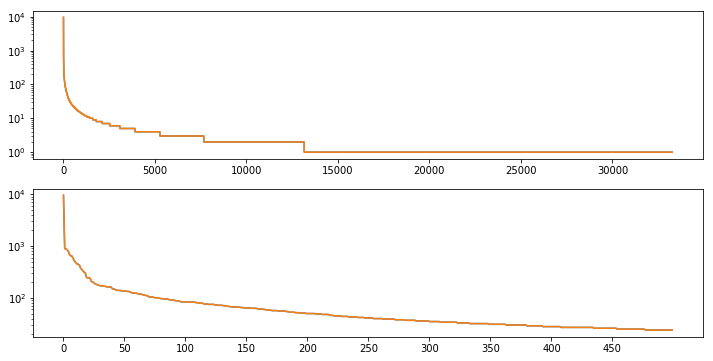

In [50]:
cntr = Counter()
for path,_,files in os.walk(roll_folder):
    for name in files:
        _path = path.replace('\\', '/') + '/'
        _name = name.replace('\\', '/')
        notes = pickle.load(open(_path + _name,'rb'))
        for note in notes:
            if note in cntr:
                cntr[note] +=1
            else:
                cntr[note] = 1
# print(cntr.items())

plt.figure(figsize=(12,6))

lists = cntr.most_common(n=100000)

x, y = zip(*lists)
plt.subplot(211)
plt.plot(y)
plt.semilogy(y)
cms = cntr.most_common(n = 500)

x,y = zip(*cms)
plt.subplot(212)
plt.plot(y)
plt.semilogy(y)
my_x_ticks = np.arange(0, len(y), 50)

plt.xticks(my_x_ticks)
plt.show()

In [59]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=4):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

(128, 368)
(128, 552)


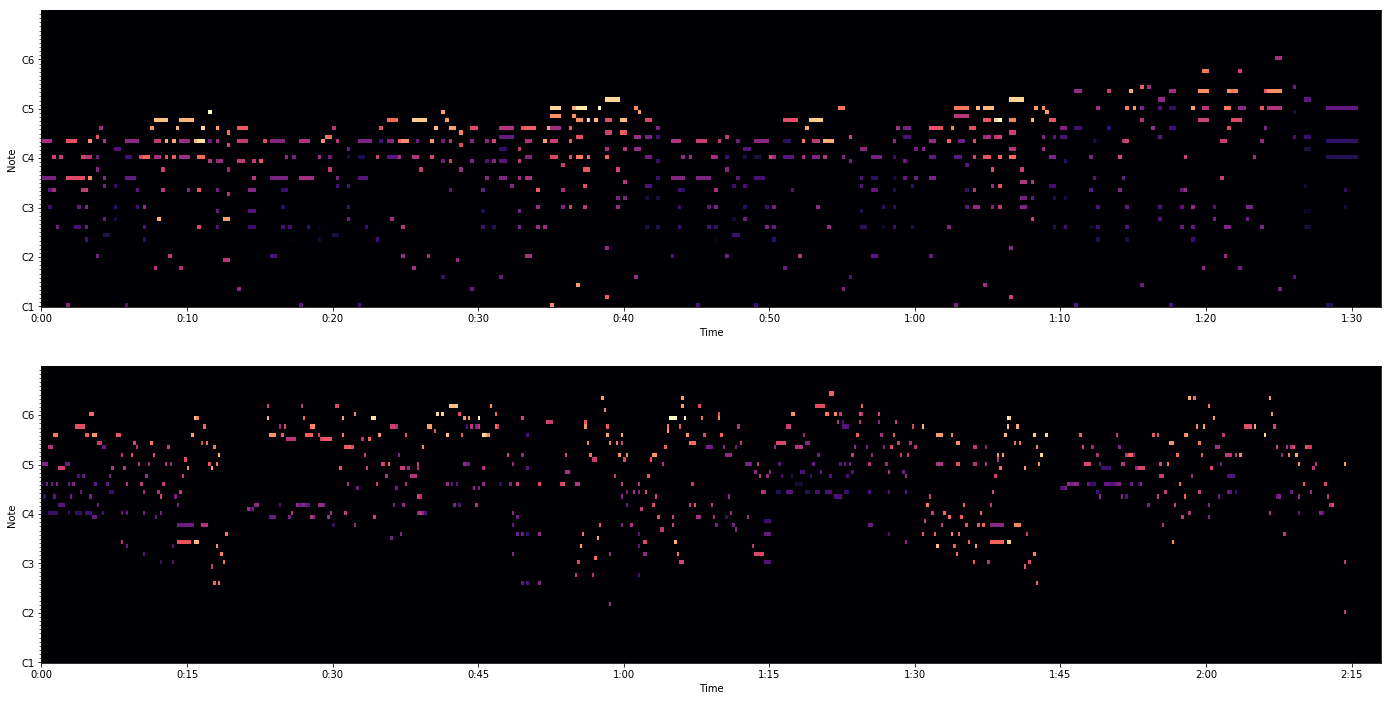

In [71]:
plt.figure(figsize=(24,12))

for path,_,files in os.walk(tempo_folder):
    for i,name in enumerate(files[:2]):
        _path = path.replace('\\','/') + '/'
        _name = name.replace('\\','/')
        md = pm.PrettyMIDI(_path+_name)
        pos = 210 + i+1
        plt.subplot(pos)
        plot_piano_roll(md, 24, 96)
        pr = md.get_piano_roll(fs = 4)
        print(pr.shape)
#         df = pd.DataFrame(pr, columns=list('xy'))
        